In [58]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [83]:
pip install spacy

     |████████████████████████████████| 10.5MB 6.3MB/s eta 0:00:01    |█████████▊                      | 3.2MB 1.3MB/s eta 0:00:06
     |████████████████████████████████| 215kB 1.4MB/s eta 0:00:01
     |████████████████████████████████| 71kB 10.2MB/s eta 0:00:01
     |████████████████████████████████| 61kB 6.7MB/s eta 0:00:011
     |████████████████████████████████| 184kB 1.7MB/s eta 0:00:01
     |████████████████████████████████| 2.2MB 1.8MB/s eta 0:00:01
     |████████████████████████████████| 4.0MB 3.4MB/s eta 0:00:01
  Found existing installation: tqdm 4.36.1
    Uninstalling tqdm-4.36.1:
      Successfully uninstalled tqdm-4.36.1
Note: you may need to restart the kernel to use updated packages.


In [91]:
pip install spacy && python -m spacy download en

     |████████████████████████████████| 12.0MB 5.0MB/s eta 0:00:01
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.5-cp37-none-any.whl size=12011740 sha256=eb2d88040e96a67f86c3a05335cdf5b0d3bb8fb5dba1bfec43ee2f84d18aaaac
  Stored in directory: /private/var/folders/yk/7th_5lwj0k941lrjtdvx5rv80000gn/T/pip-ephem-wheel-cache-t63eqw78/wheels/6a/47/fb/6b5a0b8906d8e8779246c67d4658fd8a544d4a03a75520197a
Successfully built en-core-web-sm
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/opt/anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
/opt/anaconda3/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')
Note: you may need to restart the kernel to use updated packages.


In [84]:
import re
import pandas as pd
import csv
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from gensim.corpora.dictionary import Dictionary
import spacy

In [4]:
my_string = "This is 11 0'clock on Sunday morning. I am here at the house 4259 by my self. I am studying NLP 2 times, I like a lot."

In [5]:
sentence_endings = r"[.?!]"
print(re.split(sentence_endings, my_string))

["This is 11 0'clock on Sunday morning", ' I am here at the house 4259 by my self', ' I am studying NLP 2 times, I like a lot', '']


In [6]:
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

['This', 'Sunday', 'NLP']


In [7]:
spaces = r"\s+"
print(re.split(spaces, my_string))

['This', 'is', '11', "0'clock", 'on', 'Sunday', 'morning.', 'I', 'am', 'here', 'at', 'the', 'house', '4259', 'by', 'my', 'self.', 'I', 'am', 'studying', 'NLP', '2', 'times,', 'I', 'like', 'a', 'lot.']


In [8]:
digits = r"\d+"
print(re.findall(digits, my_string))

['11', '0', '4259', '2']


In [9]:
string = "President: My fellow Americans: Tonight, I want to speak with you about our nation’s unprecedented response to the coronavirus outbreak that started in China and is now spreading throughout the world.\nWe have been in frequent contact with our allies, and we are marshalling the full power of the federal government and the private sector to protect the American people.\nThis is the most aggressive and comprehensive effort to confront a foreign virus in modern history.  I am confident that by counting and continuing to take these tough measures,\nwe will significantly reduce the threat to our citizens, and we will ultimately and expeditiously defeat this virus.\nOur team is the best anywhere in the world.  At the very start of the outbreak, \nwe instituted sweeping travel restrictions on China and put in place the first federally mandated quarantine in over 50 years.\nWe declared a public health emergency and issued the highest level of travel warning on other countries as the virus spread its horrible infection."

In [10]:
sentences = sent_tokenize(string)
print(sentences)

['President: My fellow Americans: Tonight, I want to speak with you about our nation’s unprecedented response to the coronavirus outbreak that started in China and is now spreading throughout the world.', 'We have been in frequent contact with our allies, and we are marshalling the full power of the federal government and the private sector to protect the American people.', 'This is the most aggressive and comprehensive effort to confront a foreign virus in modern history.', 'I am confident that by counting and continuing to take these tough measures,\nwe will significantly reduce the threat to our citizens, and we will ultimately and expeditiously defeat this virus.', 'Our team is the best anywhere in the world.', 'At the very start of the outbreak, \nwe instituted sweeping travel restrictions on China and put in place the first federally mandated quarantine in over 50 years.', 'We declared a public health emergency and issued the highest level of travel warning on other countries as 

In [11]:
unique_tokens = set(word_tokenize(string))
print(unique_tokens)


{'years', 'are', 'foreign', 'confident', 'anywhere', 'measures', 'coronavirus', 'of', 'put', 'team', 'spreading', '50', 'have', 'China', 'best', 'emergency', 'threat', 'infection', 'very', 'government', 'continuing', 'been', ':', 'the', 'declared', 'you', 'federal', 'We', 'countries', 'people', 'aggressive', 'At', 'speak', 'frequent', 'federally', 'contact', 'counting', 'spread', 'defeat', 'will', 'as', 'these', ',', '’', 's', 'expeditiously', 'travel', 'in', 'I', 'full', 'mandated', 'restrictions', 'other', 'tough', 'Our', 'on', 'place', 'that', 'American', 'issued', 'ultimately', 'started', 'instituted', 'now', 'throughout', 'a', 'sector', 'significantly', 'world', 'citizens', 'want', 'response', 'nation', 'with', 'first', 'reduce', 'over', 'horrible', 'and', 'this', 'its', 'to', 'is', 'My', 'history', 'modern', 'start', 'by', 'highest', 'am', 'virus', 'confront', '.', 'quarantine', 'effort', 'This', 'allies', 'health', 'power', 'fellow', 'Tonight', 'President', 'Americans', 'protect

In [12]:
match = re.search('threat', string)
print(match.start(), match.end())

581 587


In [13]:
# Find anything 
pattern_1 = r"\[.*\]"
print(re.search(pattern_1, string))

None


In [14]:
pattern_2 = r"[\w\s]+:"
print(re.match(pattern_2, string))

<re.Match object; span=(0, 10), match='President:'>


In [15]:
string_2 = "Good evening, my fellow Americans, and Happy Lunar New Year. I'm Stacey Abrams, and I'm honored to join the conversation about the state of our union. Growing up, my family went back and forth between lower middle class and working class. Yet even when they came home weary and boom, tired, my parents found a way to show us all who we could be. My librarian mother taught us to love learning. My father shipyard worker, put in overtime and extra shifts, and they made sure we volunteered to help others. Later, they both became United Methodist ministers, an expression of the faith that guides us. These were our family values, faith, service, education, and responsibility. Now, we only had one car, so sometimes my dad had to hitchhike and walk long stretches during the 30 mile trip home from the shipyards. One rainy night my mom got worried, we pile up In the car and went out looking for him, and we eventually found my dad making his way along the road, soaked and shivering in a shirtsleeves. When he got in the car. My mom asked if he'd left his coat at work. He explained that he'd given it to a homeless man he'd met on the highway. When we asked why he given away his only jacket, my dad turned to us and said, I knew when I left that man, he'd still be alone. But I could give him my coat, because I knew you were coming for me. Our power and strength as Americans lives in our hard work and our belief in more. My family understood firsthand that all success is not guaranteed. We live in a nation where opportunity is possible. But we do not succeed alone in these United States. When times are tough. We can persevere because our friends and neighbors will come for us. Our first responders will come for us. It is this mantra This uncommon grace of community that has driven me to become an attorney, a small business owner, a writer, and most recently, the Democratic nominee for governor of Georgia. My reason for running was simple. I love our country, and its promise of opportunity for all. And I stand here tonight, because I hold fast to my father's credo. Together, we are coming for America for a better America. Just a few weeks ago, I joined volunteers to distribute meals to furloughed federal workers. They waited in line for a box of food and a sliver of hope, since they hadn't received paychecks in weeks. Making livelihoods of our federal workers upon for political games is a disgrace. The shutdown was a stunt engineered by the President of the United States, one that defied every tenet of fairness And abandoned not just our people, but our values. For seven years I led the Democratic Party in the Georgia House of Representatives. I didn't always agree with the republican speaker or governor. But I understood that our constituents didn't care about our political parties. They cared about their lives. So when we had to negotiate criminal justice reform, or transportation, or foster care improvements, the leaders of our state didn't shut down. We came together, and we kept our word. It should be no different in our nation's capital. We may come from different sides of the political aisle. But our joint commitment to the ideals of this nation cannot be negotiable. Our most urgent work is to realize Americans dreams of today and tomorrow, to carve a path to independence and prosperity that can last a lifetime. children deserve an excellent education from cradle To career, we owe them safe schools and the highest standards regardless of zip code. Yet this White House response timidly, well, first graders practice active shooter drills, and the price of higher education goes ever steeper. From now on. Our leaders must be willing to tackle gun safety measures and face the crippling effect of educational loans to support educators and invest what is necessary to unleash the power of America's greatest minds. In Georgia and around the country. People are striving for a middle class where a salary truly equals economic security. But instead, families hopes are being crushed by Republican leadership that ignores real life or just doesn't understand it. Under the current administration, far too many hard working Americans are falling behind living paycheck to paycheck, most without labor unions to protect them From even worse harm. The Republican tax bill rigged the system against working people. Rather than bringing back jobs. Plants are closing, layoffs are looming, and wages struggle to keep pace with the actual cost of living. We owe more to the millions of everyday folks who keep our economy running by truck drivers forced to buy their own rigs. Farmers taught in a trade war, small business owners in search of capital and domestic workers serving without labor protections, women and men who could thrive if only they have the support and freedom to do so. We know bipartisanship could craft the 21st century immigration plan. But this administration chooses to cage children and tear families apart. compassionate treatment at the border is not the same as open borders. President Reagan understood this. President Obama understood this Americans understand this, and democrats stand ready to effectively secure our ports and borders. But we must all embrace that from agriculture to health care to entrepreneurship. America is made stronger by the presence of immigrants, not walls."

In [16]:
# Loading the text file.

f = open("response.txt", 'rU')
text = f.read()
print(text)

Unknown Speaker  0:00  
Good evening, my fellow Americans, and Happy Lunar New Year. I'm Stacey Abrams, and I'm honored to join the conversation about the state of our union. Growing up, my family went back and forth between lower middle class and working class. Yet even when they came home weary and boom, tired, my parents found a way to show us all who we could be. My librarian mother taught us to love learning. My father shipyard worker, put in overtime and extra shifts, and they made sure we volunteered to help others. Later, they both became United Methodist ministers, an expression of the faith that guides us. These were our family values, faith, service, education, and responsibility. Now, we only had one car, so sometimes my dad had to hitchhike and walk long stretches during the 30 mile trip home from the shipyards. One rainy night my mom got worried, we pile up In the car and went out looking for him, and we eventually found my dad making his way along the road, soaked and sh

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
sentences = sent_tokenize(text)
print(sentences)

['Unknown Speaker  0:00  \nGood evening, my fellow Americans, and Happy Lunar New Year.', "I'm Stacey Abrams, and I'm honored to join the conversation about the state of our union.", 'Growing up, my family went back and forth between lower middle class and working class.', 'Yet even when they came home weary and boom, tired, my parents found a way to show us all who we could be.', 'My librarian mother taught us to love learning.', 'My father shipyard worker, put in overtime and extra shifts, and they made sure we volunteered to help others.', 'Later, they both became United Methodist ministers, an expression of the faith that guides us.', 'These were our family values, faith, service, education, and responsibility.', 'Now, we only had one car, so sometimes my dad had to hitchhike and walk long stretches during the 30 mile trip home from the shipyards.', 'One rainy night my mom got worried, we pile up In the car and went out looking for him, and we eventually found my dad making his way

In [18]:
unique_tokens = set(word_tokenize(text))
print(unique_tokens)
print(len(unique_tokens))

{'conversation', 'years', 'support', 'persevere', '2018', 'truck', 'became', 'suppression', 'https', 'responders', 'him', 'strong', 'Later', 'walk', 'Medicaid', 'bedrock', 'stay', 'attorneys', 'prostate', 'elections', 'In', 'measure', 'same', 'minds', 'revisit', 'loans', 'worker', 'So', 'understood', 'crippling', 'deeper', 'racism', 'lower', 'diversity', 'maternal', 'been', 'hospitals', 'majority', 'lives', 'last', 'Civil', 'educational', 'seven', '0:00', 'But', 'We', 'what', 'hitchhike', 'everyday', 'bless', 'waited', 'moral', 'shivering', 'looming', 'negotiate', 'pace', 'tired', 'Making', 'could', 'rent', 'values', 'night', 'them', 'walls', ',', 'cost', 'guaranteed', 'life', 'black', 'possible', 'The', 'had', 'paying', 'educators', 'deeds', 'cynicism', 'understand', 'American', 'effect', 'coming', 'continue', '10:10', 'When', 'distribute', 'now', 'harm', 'too', 'worried', 'a', 'general', 'cover', 'opportunity', 'yet', 'crisis', 'agenda', '10:13', '//otter.ai', 'long', 'allow', 'State

In [19]:
file = open('press.txt', 'rU')
press = file.read()
print(press)

Well, thank you very much. Please. This afternoon, I'll sign a proclamation declaring the month of May to be Older Americans Month. I don't know if I'm in that category. I have a feeling I am, but I feel good and our country is making a lot of progress, Alex, I will tell you that. Making a lot of progress. As we honor the incredible contributions of our nation's seniors, we're here today to discuss the unprecedented steps that we're taking to protect our seniors from the virus. I'll also announce vital new actions to safeguard our nursing homes and most vulnerable citizens as we gradually and safely reopen our country and it's very exciting to see what's happening. We're joined today by Secretary Alex Azar, thank you. Secretary Robert Wilkie. Robert, thank you very much. Administrator Seema Verma, thank you, great job. FEMA administrator, Pete Gaynor and Chief of national guard, bureau general Joseph Lengyel.
Donald Trump:  Thanks also to Tennessee Governor Bill Lee, my friend. Thank y

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


In [20]:
sentences_t = sent_tokenize(press)
print(sentences_t)

['Well, thank you very much.', 'Please.', "This afternoon, I'll sign a proclamation declaring the month of May to be Older Americans Month.", "I don't know if I'm in that category.", 'I have a feeling I am, but I feel good and our country is making a lot of progress, Alex, I will tell you that.', 'Making a lot of progress.', "As we honor the incredible contributions of our nation's seniors, we're here today to discuss the unprecedented steps that we're taking to protect our seniors from the virus.", "I'll also announce vital new actions to safeguard our nursing homes and most vulnerable citizens as we gradually and safely reopen our country and it's very exciting to see what's happening.", "We're joined today by Secretary Alex Azar, thank you.", 'Secretary Robert Wilkie.', 'Robert, thank you very much.', 'Administrator Seema Verma, thank you, great job.', 'FEMA administrator, Pete Gaynor and Chief of national guard, bureau general Joseph Lengyel.', 'Donald Trump:  Thanks also to Tennes

In [21]:
unique_tokens_t = set(word_tokenize(press))
print(unique_tokens_t)
print(len(unique_tokens_t))

{'advised', 'testing', 'support', 'vulnerable', 'proclamation', 'Month', 'deal', 'In', 'month', 'doctors', '?', 'So', 'steps', 'expanded', 'choice', 'been', 'But', 'We', 'what', 'seen', 'patient', 'seniors.\\', 'rapidly', 'medically', 'visits', 'ensured', 'Making', 'dollars', 'things', 'Especially', 'helping', 'them', 'after', 'deliver', ',', 'cost', 'Older', 'life', 'travel', 'difficult', 'The', 'paying', 'deployed', 'really', 'Wilkie', 'infectious', 'coming', 'now', 'category', 'hit', 'Please', 'too', 'funding', 'a', 'general', 'speed', 'long', 'want', 'some', 'May', 'members', 'good', 'zero', 'Same', 'up', 'veterans', 'bureau', 'am', 'Pete', '.', 'mourn', 'roughly', 'allies', '35,000', 'one', 'an', 'Sweden', 'March', 'our', 'resource', 'number', 'swiftly', 'unprecedented', 'age', 'tell', 'thing', 'thousands', 'for', 'home', 'here', 'all', 'Thank', 'tragically', 'achievement', 'healthcare', 'remdesivir', 'Administrator', 'do', 'fantastic', 'supplies', 'America', "I\\'92d", 'disabilit

In [22]:
tweets = '#And then came a Plague, a great and powerful Plague, #and the World was never to be the same again! But America rose from this death and destruction, always remembering its many lost souls, and the lost souls all over the World, <3 and became greater than ever before! @trump'

In [23]:
pattern5 = r"#\w+"
hashtags = regexp_tokenize(tweets, pattern5)
print(hashtags)

['#And', '#and']


In [24]:
pattern6 = r"[\#\@\<]\w+"
print(regexp_tokenize(tweets, pattern6))

['#And', '#and', '<3', '@trump']


In [25]:
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['#'], ['A'], ['n'], ['d'], [], ['t'], ['h'], ['e'], ['n'], [], ['c'], ['a'], ['m'], ['e'], [], ['a'], [], ['P'], ['l'], ['a'], ['g'], ['u'], ['e'], [','], [], ['a'], [], ['g'], ['r'], ['e'], ['a'], ['t'], [], ['a'], ['n'], ['d'], [], ['p'], ['o'], ['w'], ['e'], ['r'], ['f'], ['u'], ['l'], [], ['P'], ['l'], ['a'], ['g'], ['u'], ['e'], [','], [], ['#'], ['a'], ['n'], ['d'], [], ['t'], ['h'], ['e'], [], ['W'], ['o'], ['r'], ['l'], ['d'], [], ['w'], ['a'], ['s'], [], ['n'], ['e'], ['v'], ['e'], ['r'], [], ['t'], ['o'], [], ['b'], ['e'], [], ['t'], ['h'], ['e'], [], ['s'], ['a'], ['m'], ['e'], [], ['a'], ['g'], ['a'], ['i'], ['n'], ['!'], [], ['B'], ['u'], ['t'], [], ['A'], ['m'], ['e'], ['r'], ['i'], ['c'], ['a'], [], ['r'], ['o'], ['s'], ['e'], [], ['f'], ['r'], ['o'], ['m'], [], ['t'], ['h'], ['i'], ['s'], [], ['d'], ['e'], ['a'], ['t'], ['h'], [], ['a'], ['n'], ['d'], [], ['d'], ['e'], ['s'], ['t'], ['r'], ['u'], ['c'], ['t'], ['i'], ['o'], ['n'], [','], [], ['a'], ['l'], ['w'], ['a']

In [26]:
lines = press.split('\n')
print(lines)

["Well, thank you very much. Please. This afternoon, I'll sign a proclamation declaring the month of May to be Older Americans Month. I don't know if I'm in that category. I have a feeling I am, but I feel good and our country is making a lot of progress, Alex, I will tell you that. Making a lot of progress. As we honor the incredible contributions of our nation's seniors, we're here today to discuss the unprecedented steps that we're taking to protect our seniors from the virus. I'll also announce vital new actions to safeguard our nursing homes and most vulnerable citizens as we gradually and safely reopen our country and it's very exciting to see what's happening. We're joined today by Secretary Alex Azar, thank you. Secretary Robert Wilkie. Robert, thank you very much. Administrator Seema Verma, thank you, great job. FEMA administrator, Pete Gaynor and Chief of national guard, bureau general Joseph Lengyel.", "Donald Trump:  Thanks also to Tennessee Governor Bill Lee, my friend. Th

In [27]:
pattern7 = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"

In [31]:
lines = [re.sub(pattern7, "", l) for l in lines]


In [32]:
tokenize_lines = [regexp_tokenize(s, "\w+") for s in lines]

In [33]:
line_num_words = [len(t_line) for t_line in tokenize_lines]

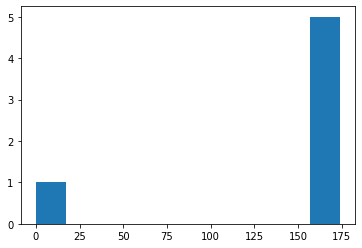

In [34]:
plt.hist(line_num_words)
plt.show()

In [35]:
tokens = word_tokenize(text)

In [36]:
lower_tokens = [t.lower() for t in tokens]

In [37]:
bow_simple = Counter(lower_tokens)

In [38]:
print(bow_simple.most_common(10))

[('.', 99), (',', 82), ('and', 67), ('the', 59), ('to', 57), ('our', 38), ('we', 38), ('of', 33), ('a', 24), ('in', 23)]


In [39]:
# Retain alphabetical characters

In [50]:
alpha_only = [t for t in lower_tokens if t.isalpha()]

In [44]:
#  Remove all the stop words

no_stops = [t for t in alpha_only if t not in stopwords.words('english')]

In [45]:
word_lemmatizer = WordNetLemmatizer()

In [47]:
lemmatized = [word_lemmatizer.lemmatize(t) for t in no_stops]

In [53]:
bow_s = Counter(lemmatized)
print(bow_s.most_common(10))

[('america', 10), ('american', 8), ('state', 8), ('family', 7), ('must', 7), ('u', 6), ('right', 6), ('speaker', 5), ('could', 5), ('life', 5)]


In [56]:
# Compare Trump 

tokens_t = word_tokenize(press)
lower_token_t = [t.lower() for t in tokens_t]
alpha_token_t = [t for t in lower_token_t if t.isalpha()]
no_stops_t = [t for t in alpha_token_t if t not in stopwords.words('english')]
lemmatized_t = [word_lemmatizer.lemmatize(t) for t in no_stops_t]
bow_t = Counter(lemmatized_t)
print(bow_t.most_common(10))


[('home', 10), ('thank', 7), ('country', 7), ('nursing', 7), ('senior', 6), ('also', 5), ('people', 5), ('ventilator', 5), ('much', 4), ('older', 4)]


In [75]:
dictionary = Dictionary(lemmatized)
# dictionary.token2id

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [ ]:
computer_id = dictionary.token2id.get("")

In [68]:
corpus = [dictionary.doc2bow([t]) for t in lemmatized]

In [73]:
my_documents = ['The movie was about a spaceship and aliens.',
...: 'I really liked the movie!',
...: 'Awesome action scenes, but boring characters.',
...: 'The movie was awful! I hate alien films.',
...: 'Space is cool! I liked the movie.',
...: 'More space films, please!',]

In [77]:
tokenized_docs = [word_tokenize(doc.lower())for doc in my_documents]

In [78]:
dictionary = Dictionary(tokenized_docs)

In [79]:
dictionary.token2id

{'.': 0,
 'a': 1,
 'about': 2,
 'aliens': 3,
 'and': 4,
 'movie': 5,
 'spaceship': 6,
 'the': 7,
 'was': 8,
 '!': 9,
 'i': 10,
 'liked': 11,
 'really': 12,
 ',': 13,
 'action': 14,
 'awesome': 15,
 'boring': 16,
 'but': 17,
 'characters': 18,
 'scenes': 19,
 'alien': 20,
 'awful': 21,
 'films': 22,
 'hate': 23,
 'cool': 24,
 'is': 25,
 'space': 26,
 'more': 27,
 'please': 28}

In [81]:
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(5, 1), (7, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(0, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)],
 [(0, 1),
  (5, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1)],
 [(0, 1), (5, 1), (7, 1), (9, 1), (10, 1), (11, 1), (24, 1), (25, 1), (26, 1)],
 [(9, 1), (13, 1), (22, 1), (26, 1), (27, 1), (28, 1)]]

In [92]:
# Name Entity Recognition (NER)

nlp = spacy.load('en') 
# tagger=False, parser=False, matcher=False)

In [93]:
doc = nlp(text)

In [94]:
for ent in doc.ents:
    print(ent.label_, ent.text)

NORP Americans
PERSON Happy Lunar
PERSON Stacey Abrams
PERSON United Methodist
CARDINAL one
QUANTITY the 30 mile
CARDINAL One
NORP Americans
GPE these United States
ORDINAL first
NORP Democratic
GPE Georgia
TIME tonight
GPE America
GPE America
DATE Just a few weeks ago
DATE weeks
GPE the United States
DATE seven years
ORG the Democratic Party
FAC the Georgia House of Representatives
NORP republican
NORP Americans
DATE today
DATE tomorrow
ORG White House
ORDINAL first
GPE America
GPE Georgia
NORP Republican
NORP Americans
NORP Republican
CARDINAL millions
DATE the 21st century
PERSON Reagan
PERSON Obama
NORP Americans
NORP democrats
GPE America
CARDINAL 6:19
NORP republican
DATE years
NORP Americans
CARDINAL 14
ORG Medicaid
DATE 2018
GPE Georgia
NORP Americans
GPE America
PERSON Jim Crow
LAW the Civil Rights Act
LAW the Voting Rights Act
GPE America
LAW Roe v. Wade
ORG LGBTQ
GPE America
NORP American
CARDINAL 10:10
CARDINAL 10:13
GPE America
GPE America
PERSON God
GPE the United States 